# Data information: 
The Avila data set has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist.


Data have been normalized by using the Z-normalization method and divided into two data sets: a training set containing 10430 samples, and a test set containing the 10437 samples.

# Attribute Information:

- F1: intercolumnar distance
- F2m: upper margin
- F3: lower margin
- F4: exploitation
- F5: row number
- F6: modular ratio
- F7: interlinear spacing
- F8: weight
- F9: peak number
- F10: modular ratio/ interlinear spacing
- Class: A, B, C, D, E, F, G, H, I, W, X, Y


**CLASS DISTRIBUTION (training set)**

A: 4286 | B: 5 | C: 103 | D: 352 | E: 1095 | F: 1961 | G: 446 | H: 519 | I: 831 | W: 44 | X: 522 | Y: 266 |

# **Problem Statement:** 
To identify the letters of the English alphabet, from the Avila Bible's sample containing 10437 characters


# Import necessary libraries

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [0]:
columns = ['intercolumnar_distance', 'upper_margin' ,'lower_margin' ,'exploitation' ,'row_number' ,'modular_ratio', 
           'interlinear_spacing', 'weight','peak_number','modular ratio/interlinear spacing','class']

train = pd.read_csv('avila_train.csv', header = -1, names = columns )
test = pd.read_csv('avila_test.csv', header = -1, names = columns)

In [0]:
train.head()

,intercolumnar_distance,upper_margin,lower_margin,exploitation,row_number,modular_ratio,interlinear_spacing,weight,peak_number,modular ratio/interlinear spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


# Brief exploration of the data

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
intercolumnar_distance               10430 non-null float64
upper_margin                         10430 non-null float64
lower_margin                         10430 non-null float64
exploitation                         10430 non-null float64
row_number                           10430 non-null float64
modular_ratio                        10430 non-null float64
interlinear_spacing                  10430 non-null float64
weight                               10430 non-null float64
peak_number                          10430 non-null float64
modular ratio/interlinear spacing    10430 non-null float64
class                                10430 non-null object
dtypes: float64(10), object(1)
memory usage: 896.4+ KB


- There are no null values that need to be treated
- All of the features are floating point values
- We have 10429 instances and 11 columns

In [0]:
pd.DataFrame({'train' : train['class'].value_counts() ,
              '% in train' : [round(x/len(train['class']), 4) for x in train['class'].value_counts()],
              'test' : test['class'].value_counts(),
             '% in test' : [round(x/len(test['class']), 4) for x in test['class'].value_counts()]})

,train,% in train,test,% in test
A,4286,0.4109,4286,0.4107
F,1961,0.1880,1962,0.1880
E,1095,0.1050,1095,0.1049
I,831,0.0797,832,0.0797
X,522,0.0500,522,0.0500
H,519,0.0498,520,0.0498
G,446,0.0428,447,0.0428
D,352,0.0337,353,0.0338
Y,266,0.0255,267,0.0256
C,103,0.0099,103,0.0099


- The above numbers tell us the class distribution of both the datasets
- The classes are very imbalanced only two classes constitute 60% of the data 

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


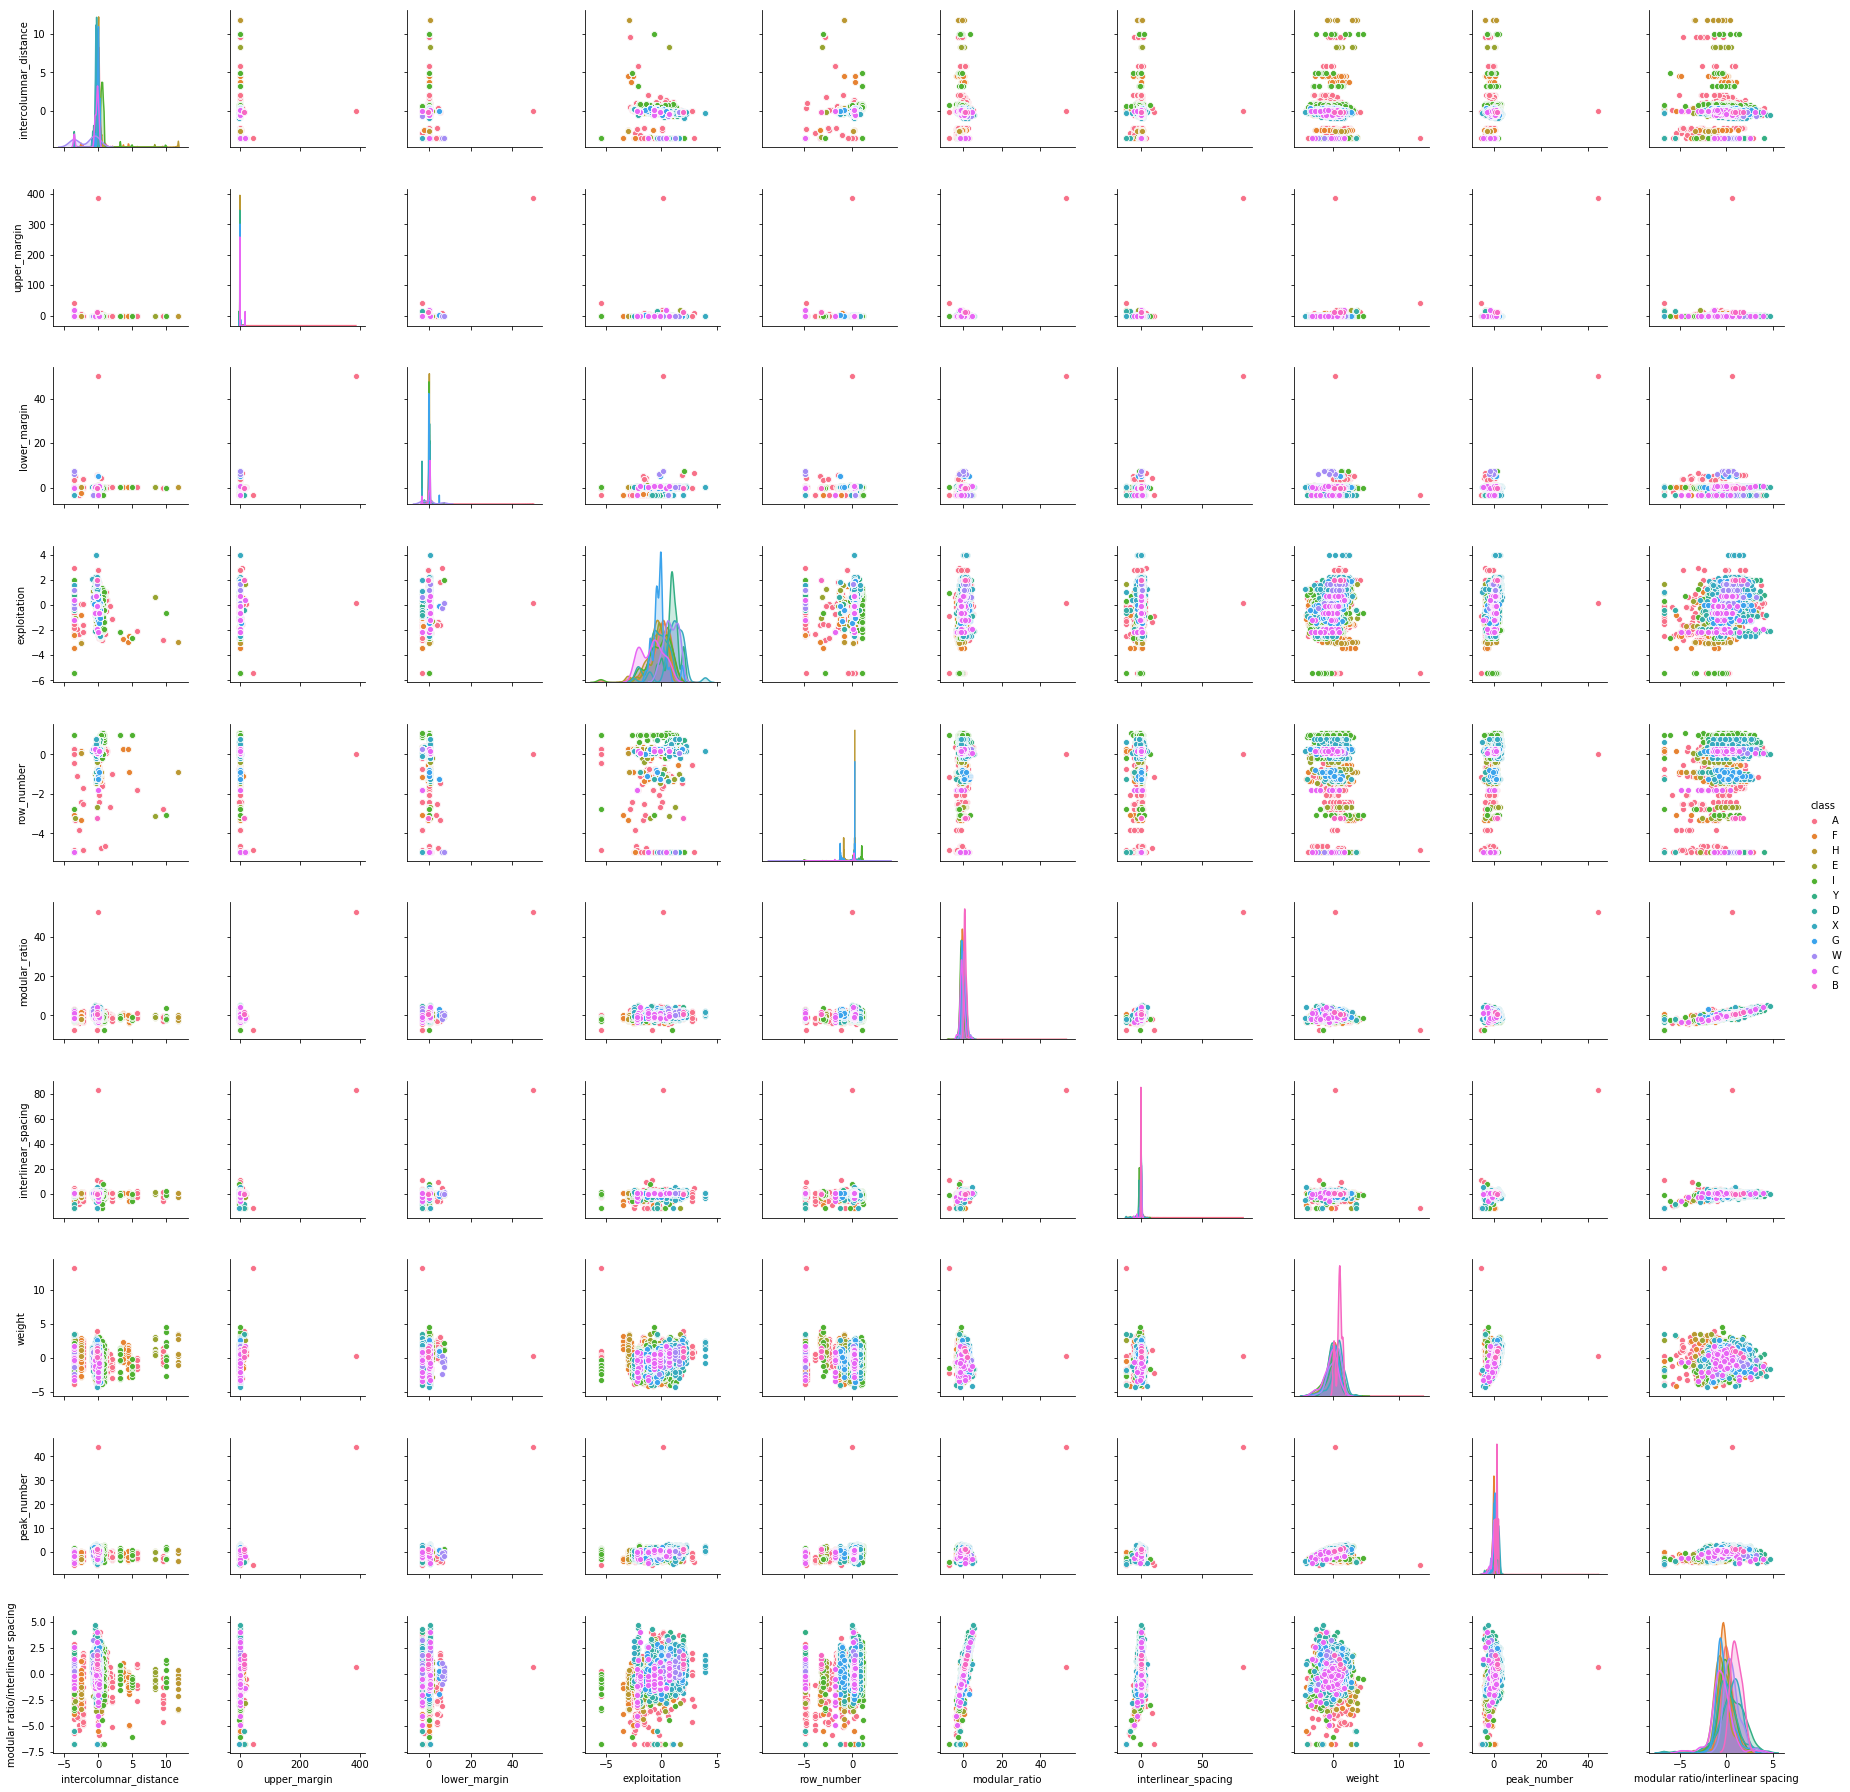

In [0]:
sns.pairplot(train, diag_kind = 'kde', hue = 'class')
plt.show()

* There doesn't seem to be any apparent apparent relationship amongst variables (linear or otherwise)
- Most of the datapoints overlap for any two given features
- Let's carry on with training our model to classify the data

# Pick out X(predictor(s)) and y(response)

In [0]:
X_train = train.drop(columns= 'class')
y_train = train['class']

X_test = test.drop(columns='class')
y_test = test['class']

# Train and evaluate models
### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear', multi_class= 'auto')

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr_score = logreg.score(X_test, y_test)
print(f"Score : {lr_score}")

Score : 0.5307080578710357


- The accuracy is 53%, possibly because of the class imbalance
- Since it is a multi-class problem, simple accuracy does not give us the whole picture
- Let's check what percentage of each class has the model got right

In [0]:
pred = logreg.predict(X_test)  

In [0]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()  # empty dataframe

    for i in np.sort(actual.unique()):
        try:  # because we get a key error if we use value_counts()[i] when the given class i does not exist in the value_count() array
            a.loc[i,'total_instances'] = len(actual[actual == i]) # value count of a given class i
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i] # number of instances where a given class i was identified correctly
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)  # percentage of predictions that were correct for a given class
        except:  # if the key error discussed above occurs, assign the percentage = 0
            a.loc[i, '%'] = 0.0
    return a

In [0]:
pred_vs_actual_lr = rightly_identified(y_test, pred)
pred_vs_actual_lr

,total_instances,identified_right,%
A,4286.0,4158.0,97.0
B,5.0,2.0,40.0
C,103.0,NaN,0.0
D,353.0,NaN,0.0
E,1095.0,75.0,6.8
F,1962.0,55.0,2.8
G,447.0,NaN,0.0
H,520.0,40.0,7.7
I,832.0,735.0,88.3
W,45.0,NaN,0.0


- the model has got 97% of 'A's right, likely because that was the dominant class in the dataset
- 0% of 'C's, 'D's, 'G's and 'W's were identified correctly
- Even though there were only 5 records of 'B' for the model to train, the model correctly identified 2 of the 'B's in test set

In [0]:
def con_matrix(actual, predictions):
    from sklearn.metrics import confusion_matrix

    matrix = pd.DataFrame(confusion_matrix(actual, predictions), columns = np.unique(actual), index = np.unique(actual))
    # confusion_matrix() returns the confusion matrix. Wrapping this matrix in a dataframe with appropriate column names and index
    matrix.loc[:,'total_count_actual_class'] = matrix.sum(axis = 1)  # sum accross the columns
    matrix.loc['total_count_predicted'] = matrix.sum(axis = 0)  # row sum
    return matrix

In [0]:
con_matrix(y_test, pred)

,A,B,C,D,E,F,G,H,I,W,X,Y,total_count_actual_class
A,4158,0,0,0,31,63,0,8,18,0,6,2,4286
B,3,2,0,0,0,0,0,0,0,0,0,0,5
C,80,0,0,0,9,11,0,0,3,0,0,0,103
D,327,0,0,0,5,6,0,14,0,0,1,0,353
E,917,0,0,0,75,54,0,10,10,0,28,1,1095
F,1881,0,0,0,4,55,0,4,14,0,0,4,1962
G,413,0,0,0,4,23,0,4,0,0,3,0,447
H,366,0,0,0,31,66,0,40,15,0,1,1,520
I,63,0,0,0,2,4,0,3,735,0,15,10,832
W,34,0,0,0,9,0,0,0,0,0,2,0,45


- The above table shows what is called as the 'Confusion matrix' and we have appended totals to it
- The diagonal values tell us the count of correct predictions
- From the table we can see, the model classified 8391 instances from a total of 10437 test reccords as 'A' while only 4158 of them were correct
- 'B' looks like the most unique letter of all because the model did not classify 'B' to be anything else except 'B' and 'A'

### KNN

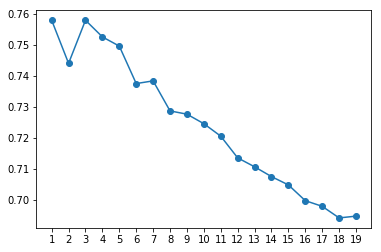

In [0]:
from sklearn.neighbors import KNeighborsClassifier

kscores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    s = knn.score(X_test, y_test)
    kscores.append(s)
plt.plot(range(1,20), kscores, 'o-')   
plt.xticks(range(1,20))
plt.show()

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
# y_pred = NNH.predict(X_test)

knn_score = knn.score(X_test, y_test)
print(f"Score : {knn_score}")

Score : 0.7578806170355467


In [0]:
pred = knn.predict(X_test)

In [0]:
pred_vs_actual_knn = rightly_identified(y_test, pred)
pred_vs_actual_knn

,total_instances,identified_right,%
A,4286.0,3686.0,86.0
B,5.0,5.0,100.0
C,103.0,45.0,43.7
D,353.0,195.0,55.2
E,1095.0,712.0,65.0
F,1962.0,1305.0,66.5
G,447.0,235.0,52.6
H,520.0,276.0,53.1
I,832.0,788.0,94.7
W,45.0,27.0,60.0


In [0]:
con_matrix(y_test, pred)

,A,B,C,D,E,F,G,H,I,W,X,Y,total_count_actual_class
A,3686,0,2,18,49,446,44,33,2,0,3,3,4286
B,0,5,0,0,0,0,0,0,0,0,0,0,5
C,36,0,45,2,8,12,0,0,0,0,0,0,103
D,84,0,6,195,24,36,1,5,1,0,1,0,353
E,213,0,13,30,712,65,11,38,1,0,10,2,1095
F,586,0,2,8,16,1305,32,11,2,0,0,0,1962
G,131,0,0,0,22,52,235,6,0,0,1,0,447
H,145,0,5,3,41,41,8,276,0,0,1,0,520
I,26,0,0,2,4,3,1,1,788,0,1,6,832
W,12,0,0,0,3,1,0,0,0,27,2,0,45


- All the 'B's were rightly identified to be 'B's and we have also earlier seen that 'B' is probably quiet unique from the other letters
- Performance of k-NN is much better than that of Logistic regression

### Naive Bayes'

In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
nb_score = nb.score(X_test, y_test)
print(f"Score : {nb_score}")

Score : 0.29328351058733354


In [0]:
pred = nb.predict(X_test)
pred_vs_actual_nb = rightly_identified(y_test, pred)
pred_vs_actual_nb

,total_instances,identified_right,%
A,4286.0,272.0,6.3
B,5.0,5.0,100.0
C,103.0,8.0,7.8
D,353.0,86.0,24.4
E,1095.0,98.0,8.9
F,1962.0,822.0,41.9
G,447.0,313.0,70.0
H,520.0,424.0,81.5
I,832.0,564.0,67.8
W,45.0,23.0,51.1


In [0]:
con_matrix(y_test, pred)

,A,B,C,D,E,F,G,H,I,W,X,Y,total_count_actual_class
A,272,0,88,326,169,1309,1059,673,108,106,146,30,4286
B,0,5,0,0,0,0,0,0,0,0,0,0,5
C,17,0,8,3,2,42,7,11,9,2,2,0,103
D,12,0,0,86,17,136,18,77,2,0,4,1,353
E,15,0,16,31,98,349,96,332,26,18,102,12,1095
F,77,0,21,100,55,822,462,376,28,6,11,4,1962
G,23,0,1,6,8,59,313,15,2,5,15,0,447
H,11,0,5,2,0,5,61,424,12,0,0,0,520
I,67,0,11,1,17,65,0,3,564,14,36,54,832
W,0,0,0,6,0,4,6,0,0,23,6,0,45


- 'B' seems to be the easiest letter to identify
- 'A' is the toughest letter for Naive Bayes' to identify
- Let's put all the models' results together to do a comparision

# Result

In [0]:
result = {}

result['Logistic Regression'] = pred_vs_actual_lr
result['k-NN'] = pred_vs_actual_knn.drop(columns= 'total_instances')
result["Naive Bayes'"] = pred_vs_actual_nb.drop(columns= 'total_instances')

In [0]:
pd.concat(result, axis = 1)

Logistic Regression                            Naive Bayes'         \
      total_instances identified_right     % identified_right      %   
A              4286.0           4158.0  97.0            272.0    6.3   
B                 5.0              2.0  40.0              5.0  100.0   
C               103.0              NaN   0.0              8.0    7.8   
D               353.0              NaN   0.0             86.0   24.4   
E              1095.0             75.0   6.8             98.0    8.9   
F              1962.0             55.0   2.8            822.0   41.9   
G               447.0              NaN   0.0            313.0   70.0   
H               520.0             40.0   7.7            424.0   81.5   
I               832.0            735.0  88.3            564.0   67.8   
W                45.0              NaN   0.0             23.0   51.1   
X               522.0            349.0  66.9            345.0   66.1   
Y               267.0            125.0  46.8            101.0   37.8   

              k-NN         
  identified_right      %  
A           3686.0   86.0  
B              5.0  100.0  
C             45.0   43.7  
D            195.0   55.2  
E            712.0   65.0  
F           1305.0   66.5  
G            235.0   52.6  
H            276.0   53.1  
I            788.0   94.7  
W             27.0   60.0  
X            435.0   83.3  
Y            201.0   75.3

In [0]:
pd.DataFrame({'Accuracy' : [lr_score, knn_score, nb_score]}, index = ['Logistic Regression', 'k-NN', 'Naive Bayes'] )

,Accuracy
Logistic Regression,0.530708
k-NN,0.757881
Naive Bayes,0.293284


# Conclusion

- k-NN has arguably performed the best of all the models
- Naive Bayes', even though has the least accuracy it has been able to identify 'G' and 'H' better than all the other models